In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
cd /content/drive/My Drive/machine_learning_cl

/content/drive/My Drive/machine_learning_cl


# get the data from txt 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]


## Logistic Regression
$$
\hat{h}=σ(z)\\
$$
$$
z=g(x,y,\theta)
$$

$$
\Theta = (\theta_0, \theta_1, ..., \theta_k-1)
$$

$$
g(x,y, \theta)=\theta_0​f_0​(x,y)+\theta_1​f_1​(x,y)+⋯+\theta_k−1​f_k−1​(x,y)\\ 
g(x,y, \theta)=\theta_0​+\theta_1x+\theta_2y+\theta_3x^2+\theta_4y^2
$$
    the dimension k of θ can be 16, but it can be less than that. 
    you can choose k for the best performance

$$
\sigma(z) = \frac{1}{1 + \exp(-z)}​
$$

## Object function 
$$
J(\theta_0, \theta_1, \theta_2) = \frac {1} {m} ​ \sum_{i=1}^m​(−l^{(i)}
log(σ(z^{(i)}))−(1−l^{(i)})log(1−σ(z^{(i)})))
$$

##Calculate the training accuracy

$$
accuracy = \frac {the\ number\ of\ correct\ predictions} {total\ number\ of\ prediction}
$$

In [0]:
""" non - linear decision boundary""" 

from math import exp

def boundary(theta0, theta1, theta2, theta3, theta4, x, y):
   line = theta0 + theta1*x + theta2*y + theta3*(x**2) + theta4*(y**2)
   return line 

def sigmoid(z):
  return (1/(1+(exp(-z))))

## hypothesis for line decision
def hypo(theta0, theta1, theta2, theta3, theta4, x, y):
  hypothesis = np.array([ sigmoid(l) 
  for l in boundary(theta0, theta1, theta2, theta3, theta4, x, y)])
  return hypothesis

def J(theta0, theta1, theta2,theta3, theta4, x, y):
  H = hypo(theta0, theta1, theta2, theta3, theta4, x, y)
  cost =  (1/len(label))*np.sum((-label)*(np.array([np.log(h) for h in H ]))
  - (1 - label)*np.array([np.log(1-h) for h in H]))
  return cost 

x = pointX
y = pointY

"""
 원의 조건
 theta3의 부호와 theta4의 부호가 같다
"""

def cal_accuracy(th0, th1, th2, th3, th4, x, y):
  ## prediction
  if th3 * th4 < 0 : 
    print("원 아님")
  if th3 > 0 and th4 > 0:
    h_labels = [1 if x <= 0 else 0 for x in boundary(th0, th1, th2, th3, th4, x, y) ]
  else :
    h_labels = [0 if x <= 0 else 1 for x in boundary(th0, th1, th2, th3, th4, x, y) ]
    
  ## check if the prediction is correct
  count = 0
  for real, hypo in zip(label, h_labels):
    if real == hypo:
      count = count + 1
  
  accuracy = count/len(h_labels)
  return accuracy

## Gradient Descent

pseudo code

repeat{
$$
\theta_k^{(t+1)} = \theta_0^{(t)} -  \alpha  \frac {1} {m} \sum_{i=1}^m (\sigma
(g(x^{(i)}, y^{(i)}, \theta)) - l^{(i)}) \frac { \alpha g(x^{(i)}, y^{(i)}, \theta)} {\alpha \theta_k} \\ for\ all\ k
$$ 
}


actual code
$$
\theta_0^{(t+1)} = \theta_0^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i}) 
$$
$$
\theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i})x^{i} 
$$
$$
\theta_2^{(t+1)} = \theta_2^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i})y^{i} 
$$

$$
\theta_3^{(t+1)} = \theta_2^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i})x^{2(i)} 
$$

$$
\theta_4^{(t+1)} = \theta_2^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i})y^{2(i)} 
$$

In [136]:
x = pointX
y = pointY

## setting for GD
th0 = -1
th1 = 0
th2 = 0
th3 = 1
th4 = 1
a = 0.1

itr = np.arange(25000)+1
list_th0 = []
list_th1 = []
list_th2 = []
list_th3 = []
list_th4 = []
list_J = []
list_accuracy=[]
for iteration in itr:

    cost = J(th0, th1, th2,th3, th4, x, y)
    accuracy = cal_accuracy(th0, th1, th2, th3, th4, x,y)
    list_th0.append(th0)
    list_th1.append(th1)
    list_th2.append(th2)
    list_th3.append(th3)
    list_th4.append(th4)
    list_J.append(cost)
    list_accuracy.append(accuracy)
    
    temp0 = th0 - a *(1/len(label))*np.sum((hypo(th0, th1, th2, th3, th4,x, y)-label))
    temp1 = th1 - a *(1/len(label))*np.sum((hypo(th0, th1, th2, th3, th4,x, y)-label)*(x))
    temp2 = th2 - a *(1/len(label))*np.sum((hypo(th0, th1, th2, th3, th4,x, y)-label)*(y))
    temp3 = th3 - a *(1/len(label))*np.sum((hypo(th0, th1, th2, th3, th4,x, y)-label)*(x**2))
    temp4 = th4 - a *(1/len(label))*np.sum((hypo(th0, th1, th2, th3, th4,x, y)-label)*(y**2))
    
    th0 = temp0
    th1 = temp1
    th2 = temp2
    th3 = temp3
    th4 = temp4
    
    #print(accuracy)
    #print("iteration : ", iteration)
    #print("cost : ", cost)
    #print("theta0 : ", th0, "theta1 : ", th1, "theta2 : ", 
         # th2, "theta3 : ", th3, "theta4 : ", th4)


원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님
원 아님


In [33]:
print(th0, th1, th2, th3, th4)

3.811341896608123 1.3583523792806425 2.299222520274228 -8.4505174171798 -7.777927272674865


#The Result

##plot the data

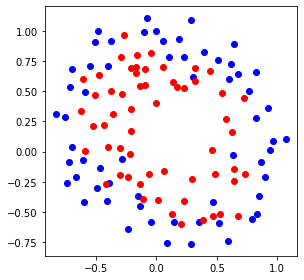

In [105]:

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


##Write down the high dimensional function g(x,y;θ)
$$ 
g(x,y, \theta)=\theta_0​+\theta_1x+\theta_2y+\theta_3x^2+\theta_4y^2
$$

##Plot the training error

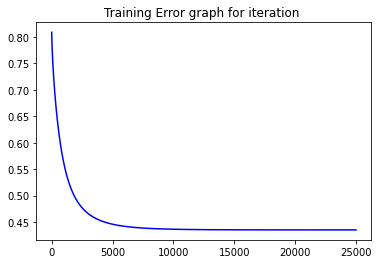

In [137]:
#J(th0, th1, th2, th3, th4, x, y)
plt.title("Training Error graph for iteration ")
plt.plot(itr, np.array(list_J), color = 'blue' )

plt.show()

##Plot the training accuracy

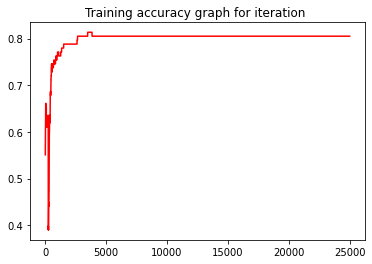

In [138]:
plt.title("Training accuracy graph for iteration ")
plt.plot(itr, np.array(list_accuracy), color = 'red' )

plt.show()

##Write down the final training accuracy

In [139]:
print("final accurary : {}%".format(round(accuracy, 3)*100))

final accurary : 80.5%


##Plot the optimal classifier superimposed on the training data 

<function matplotlib.pyplot.show>

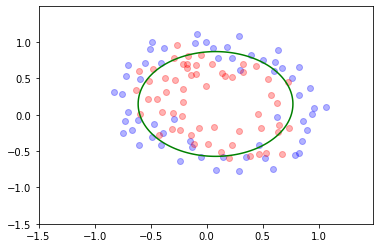

In [104]:
ax_x = np.arange(-1.5,1.5, 0.01)
ax_y = np.arange(-1.5,1.5, 0.01)
x_g, y_g = np.meshgrid(ax_x, ax_y)
plt.contour(x_g, y_g, boundary(th0, th1, th2, th3, th4, x_g, y_g), [0], colors = 'green')
plt.scatter(pointX0, pointY0, alpha=0.3, c='b')
plt.scatter(pointX1, pointY1, alpha=0.3, c='r')

plt.show